In [2]:
# This notobook connects to the azure cloud and reads in the volve dataset.
# Further work will go into showing how to explore the dataset
# How to look at the different type of folders and what files each of them contain
# and how to perform operations/read in the a specific files and import it into pandas or xarray
# More informations on the file can be found here
# I figured out how to connect to the file by following the setps n the link below as well
# This file looks specifically at the files contained in the WITSML Realtime drilling data folder
# As for now i am more interested in how I can access the name of the other folders, through python, before choosing a filename to explore
# Having found how to naviguate, albeit it's still redumentary, I will next look into an xml data of my choosing.
# https://frombitumentobinary.com/volve-dataset-exploration.html
# More information here https://www.equinor.com/en/how-and-why/digitalisation-in-our-dna/volve-field-data-village-download.html

In [3]:
from azure.storage.blob import BlockBlobService
import pandas as pd
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [4]:
# List the account name and sas_token *** I have removed the SAS token in order to allow the user to register properly thorugh Equinor's data portal
#azure_storage_account_name = 'datavillagesa'
azure_storage_account_name = 'datavillagesa'
sas_token = 'sv=2018-03-28&sr=c&sig=VKJ%2BM0yPzM3eN31hBwWtSnR2gC%2FNcDBQWlHDu3eg43U%3D&se=2020-11-17T18%3A44%3A13Z&sp=rl'

# Create a service and use the SAS 
sas_blob_service = BlockBlobService( 
    account_name=azure_storage_account_name, 
    sas_token=sas_token)

filename = 'WITSML Realtime drilling data/'

blob = sas_blob_service.list_blobs('volve', filename)
blob

In [5]:
# Initialize count variable
x = 0
print_var = False
# Initialize dictionary - defaultdict initialized every key to 0
sub_dirs = defaultdict(int)
# Iterate through list generator
for b in blob:
    x+=1
    # Perform this test to avoid files directly under the WITSML folder
    if len(b.name.split('/')) > 2:
        sub_dirs[b.name.split('/')[1]] += 1
        # Not the prettiest way to show an exmample folder structure
        if not print_var and len(b.name.split('/')) > 5:
            print(b.name)
            print_var = True

print('Total Number of Files in WITSML folder: ' + str(x))
print('Total Number of Folders under WITSML folder: ' + str(len(sub_dirs)))
well_names = set(x[x.find('1'):] for x in sub_dirs.keys())
print('Total number of wells: ' + str(len(well_names)))
print('Folders contained under WITSML Folder: ')
for key in sub_dirs.keys():
    print(key)

WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/1/log/1/1/1/00001.xml
Total Number of Files in WITSML folder: 20087
Total Number of Folders under WITSML folder: 26
Total number of wells: 17
Folders contained under WITSML Folder: 
NA-NA-15_$47$_9-F-5
Norway-NA-15_$47$_9-F-1 C
Norway-NA-15_$47$_9-F-1
Norway-NA-15_$47$_9-F-11 B
Norway-NA-15_$47$_9-F-9 A
Norway-Statoil-15_$47$_9-F-12
Norway-Statoil-15_$47$_9-F-7
Norway-Statoil-NO 15_$47$_9-F-1 B
Norway-Statoil-NO 15_$47$_9-F-1 C
Norway-Statoil-NO 15_$47$_9-F-11
Norway-Statoil-NO 15_$47$_9-F-12
Norway-Statoil-NO 15_$47$_9-F-14
Norway-Statoil-NO 15_$47$_9-F-15
Norway-Statoil-NO 15_$47$_9-F-4
Norway-Statoil-NO 15_$47$_9-F-5
Norway-Statoil-NO 15_$47$_9-F-7
Norway-Statoil-NO 15_$47$_9-F-9
Norway-StatoilHydro-15_$47$_9-F-10
Norway-StatoilHydro-15_$47$_9-F-14
Norway-StatoilHydro-15_$47$_9-F-15
Norway-StatoilHydro-15_$47$_9-F-15A
Norway-StatoilHydro-15_$47$_9-F-15B
Norway-StatoilHydro-15_$47$_9-F-15S
Norway-StatoilHydro-15_$47$_9-F-4
Norway-Stat

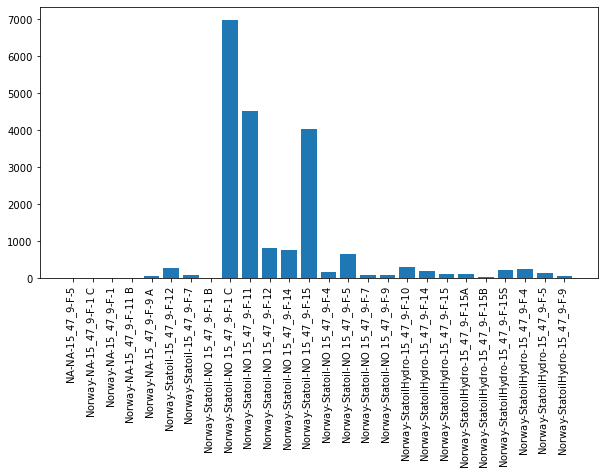

In [6]:
plt.figure(figsize = (10,5))
plt.bar(range(len(sub_dirs)), list(sub_dirs.values()), align='center')
plt.xticks(range(len(sub_dirs)), list(sub_dirs.keys()), rotation='vertical')
plt.show()

In [7]:
# With this update, one can explore the different folders with the Volve dataset
# It may be tedious at first, because one has to first observe the whole blobs
# Then from there, one can use the prefix and delimeter parameters to specify which folders and sub-folders one wants to dig in

sas_blob_service.list_blobs?

Signature:
sas_blob_service.list_blobs(
    container_name,
    prefix=None,
    num_results=None,
    include=None,
    delimiter=None,
    marker=None,
    timeout=None,
)
Docstring:
Returns a generator to list the blobs under the specified container.
The generator will lazily follow the continuation tokens returned by
the service and stop when all blobs have been returned or num_results is reached.

If num_results is specified and the account has more than that number of 
blobs, the generator will have a populated next_marker field once it 
finishes. This marker can be used to create a new generator if more 
results are desired.

:param str container_name:
    Name of existing container.
:param str prefix:
    Filters the results to return only blobs whose names
    begin with the specified prefix.
:param int num_results:
    Specifies the maximum number of blobs to return,
    including all :class:`BlobPrefix` elements. If the request does not specify
    num_results or specifies a

In [8]:
a = sas_blob_service.list_blobs(container_name='volve')
for b in a:
    print("\t" + b.name)

	GeoScience_OW_Archive/VOLVE_PUBLIC.bck
	GeoScience_OW_Archive/VOLVE_PUBLIC_Externalfiles.dszip
	GeoScience_OW_Archive/VOLVE_PUBLIC_Seismic.dszip
	Geophysical_Interpretations/Fault_polygons/2014_Volve_Hugin_Base.dat
	Geophysical_Interpretations/Fault_polygons/2014_Volve_Hugin_Top.dat
	Geophysical_Interpretations/Fault_polygons/README.txt
	Geophysical_Interpretations/Faults/README.txt
	Geophysical_Interpretations/Faults/Volve_Official_Faults.dat
	Geophysical_Interpretations/Horizons/Horizon-OW-IO-formatfile.xml
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/BCU+ST10010ZC11_NoF10_160913_adjVolve_EasyDC+STAT+DEPTH.dat
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/Hugin_Fm_Base+ST10010ZC11_Near_190314_adj_2999_EasyDC+STAT+DEPTH.dat
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/Hugin_Fm_Top+ST10010ZC11_Near_190314_adj2_2760_EasyDC+STAT+DEPTH.dat
	Geophysical_Interpretations/Horizons/Horizons_DEPTH/Official_Horizons/SH

In [9]:
a = sas_blob_service.list_blobs(container_name='volve', delimiter='/')
for b in a:
    print("\t" + b.name)

	GeoScience_OW_Archive/
	Geophysical_Interpretations/
	Production_data/
	Reports/
	Reservoir_Model-Eclipse_model/
	Reservoir_Model-RMS_model/
	Seismic/
	HRS and Terms and conditions for license to data - Volve.pdf
	WITSML Realtime drilling data/
	Well_logs/
	Well_logs_pr_WELL/
	Well_technical_data/


In [10]:
a = sas_blob_service.list_blobs(container_name='volve', prefix='WITSML Realtime drilling data/', delimiter = '/')
for b in a:
    print("\t" + b.name)

	WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-1 C/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-1/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-11 B/
	WITSML Realtime drilling data/Norway-NA-15_$47$_9-F-9 A/
	WITSML Realtime drilling data/Norway-Statoil-15_$47$_9-F-12/
	WITSML Realtime drilling data/Norway-Statoil-15_$47$_9-F-7/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-1 B/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-1 C/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-11/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-12/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-14/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-15/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-4/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-5/
	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-7/
	WITSML Re

In [22]:
# Given that I am more interested in the XML datasets, I will choose a well of my chossing and look into it

a = sas_blob_service.list_blobs(container_name='volve', 
                                prefix='WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-14/MetaFileInfo.txt', 
                                delimiter = '/')
for b in a:
    print("\t" + b.name)

	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-14/MetaFileInfo.txt


In [41]:
# Let's look at the BHArun
a = sas_blob_service.list_blobs(container_name='volve', 
                                prefix='WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-14/1/bhaRun/3', 
                                delimiter = '/')
for b in a:
    print("\t" + b.name)

	WITSML Realtime drilling data/Norway-Statoil-NO 15_$47$_9-F-14/1/bhaRun/3.xml


In [67]:
x = sas_blob_service.get_blob_to_text('volve', b.name)
x.content

'<?xml version="1.0" encoding="UTF-8"?><bhaRuns xmlns="http://www.witsml.org/schemas/1series" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.4.1.1"><bhaRun uidWell="cf870b7d-087b-4797-b000-4968e9f1beaf" uidWellbore="05fb8aee-3461-4071-8ac5-975b9bb5cc4f" uid="2VG4D36"><nameWell>NO 15/9-F-14</nameWell><nameWellbore>NO 15/9-F-14</nameWellbore><name>15/9-F-14-2</name><tubular uidRef="2VG4D36">15/9-F-14_2VG4D36</tubular><dTimStart>2016-07-30T04:40:00.000Z</dTimStart><dTimStop>2016-08-04T18:01:00.000Z</dTimStop><numStringRun>2</numStringRun><commonData><sourceName>Baker Hughes</sourceName><dTimCreation>2016-08-03T18:03:00.221Z</dTimCreation><dTimLastChange>2016-08-04T17:06:33.732Z</dTimLastChange><itemState>actual</itemState><comments>These are the comments associated with the BHARun data object</comments><priv_userLastChange>sc-sync-bhi</priv_userLastChange><priv_ipLastChange>143.97.229.4</priv_ipLastChange><priv_userOwner>statfeedstg</priv_userOwner><priv_ipOwner>10.166.1

In [77]:
soup = BeautifulSoup(x.content, 'xml')
for tag in soup.find_all():
    print(tag.name)

bhaRuns
bhaRun
nameWell
nameWellbore
name
tubular
dTimStart
dTimStop
numStringRun
commonData
sourceName
dTimCreation
dTimLastChange
itemState
comments
priv_userLastChange
priv_ipLastChange
priv_userOwner
priv_ipOwner
priv_dTimReceived


In [78]:
soup?

Signature:      soup(*args, **kwargs)
Type:           BeautifulSoup
String form:   
<?xml version="1.0" encoding="utf-8"?>
           <bhaRuns version="1.4.1.1" xmlns="http://www.witsml.org/sc <...> r><priv_dTimReceived>2016-08-04T17:04:48.700Z</priv_dTimReceived></commonData></bhaRun></bhaRuns>
Length:         1
File:           c:\users\alkassoum i toure\anaconda3\lib\site-packages\bs4\__init__.py
Docstring:     
A data structure representing a parsed HTML or XML document.

Most of the methods you'll call on a BeautifulSoup object are inherited from
PageElement or Tag.

Internally, this class defines the basic interface called by the
tree builders when converting an HTML/XML document into a data
structure. The interface abstracts away the differences between
parsers. To write a new tree builder, you'll need to understand
these methods as a whole.

These methods will be called by the BeautifulSoup constructor:
  * reset()
  * feed(markup)

The tree builder may call these methods from i